In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mopet import mopet

from synchronization import experiments
from synchronization import plots
from synchronization import runner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Effect of uncorrelated noise on coupled EI networks

Hypothesis
* in certain parameter regimes the EI networks synchronize while within synchronization decreases
* only a fraction of the neurons in a network spike in each cycle, we see a widened voltage distribution

Setup
* 2 coupled network case
* independent noise with varying strengths

Metrics & Visualization
* overlap in peak frequency in power spectrum indicates synchronization
* local and global order parameter quantify synchronization respectively
* optional: mean phase coherence

Run for different noise strenghts and plot PSD spectra of all runs.
A handful of parameter sets should suffice to get a first intuition. Afterwards we can do an exhaustive parameter exploration.

In [8]:
factor = 1

# overwriting default parameters
default_params = {

  # synaptic coupling strengths, most important parameters for tuning PING mechanism
  "J_itoi": 3.0 * factor,
  "J_etoe": 0.1 * factor,
  "J_etoi": 0.5 * factor,
  "J_itoe": 10.0 * factor,

  "runtime": 1000.0,

  "N_e": 1000,
  "N_i": 250,

  "ou_enabled": [False, False],

  # Independent spike trains generated by Poisson Point Process for each target neuron
  "poisson_enabled": [True, True],
  "poisson_variance": 1.0,
   # noise frequency ration between networks
  "poisson_p": 0.83,

  # 200 Hz as in Meng et al.
  "poisson_mean_input": 200, 

  # Neuron size of each Poisson Group
  "poisson_size": 800,
  
  "J_ppee": 2.0,
  # increase from 0.1 to 0.2 increases mainly amplitude
  "J_ppei": 2.0,

  # if set to default of 0.1 this leads to strange split in frequency band
  "const_delay": 0.2,
   "N_pop": 2,

   "p_etoe": 0.1,
   "p_etoi": 0.4,
   "p_itoe": 0.1,
   "p_itoi": 0.4,
}

params = {
  "poisson_variance": np.arange(0.1, 6, 0.5),
  "poisson_p": np.arange(0.75, 1, .025),
}

varying_params = list(params.keys())

In [9]:
ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=params, 
    default_params=default_params,
    exploration_name="uncorrelated_noise"
)

In [10]:
ex.run()

2020-06-11 20:01:59,414	INFO resource_spec.py:212 -- Starting Ray with 10.99 GiB memory available for workers and up to 5.52 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-06-11 20:01:59,672	INFO services.py:1170 -- View the Ray dashboard at localhost:8265
  0%|          | 0/120 [00:00<?, ?it/s]

(pid=3268) Initializing net ...
(pid=3268) Poisson rate for network 1:  83.33333333333334
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  500.0
(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  500.0
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  500.0
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  500.0
(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  500.0
(pid=3264) Initializing net ...
(pid=3264) Poisson rate for network 1:  500.0
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  500.0
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  83.33333333333334
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  500.0
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  500.0
(pid=3272) Initializing net ...
(pid=3272) Poisson rate for network 1:  500.0
(pid=3268) Poisson rate for network 2:  

(pid=3270) Poisson rate for network 2:  83.33333333333334
(pid=3274) Poisson rate for network 2:  83.33333333333334
(pid=3267) 1. s (100%) simulated in 24s
(pid=3267) ==== Network Run Finished ====
(pid=3267) runtime: 92.2
(pid=3267) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=3265) Poisson rate for network 2:  83.33333333333334
(pid=3267) Starting Aggregation ...
(pid=3273) Initialization time: 1.1374008655548096s
(pid=3273) ==== Running Network ... ====
(pid=3264) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=3264) 1. s (100%) simulated in 23s
(pid=3264) ==== Network Run Finished ====
(pid=3264) runtime: 92.4
(pid=3264) Starting Aggregation ...
(pid=3271) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=3271) 1. s (100%) simulated in 23s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 92.5
(pid=3271) Starting Ag

  2%|▎         | 3/120 [01:43<1:38:31, 50.52s/it] 

(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  45.45454545454545
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  45.45454545454545
(pid=3271) Poisson rate for network 2:  83.33333333333334
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  45.45454545454545


  4%|▍         | 5/120 [01:43<47:35, 24.83s/it]  

(pid=3266) Poisson rate for network 2:  45.45454545454545
(pid=3269) Poisson rate for network 2:  45.45454545454545
(pid=3275) Poisson rate for network 2:  45.45454545454545
(pid=3267) Initialization time: 1.1310629844665527s
(pid=3267) ==== Running Network ... ====


  8%|▊         | 9/120 [01:44<11:13,  6.07s/it]

(pid=3271) Initialization time: 1.1802051067352295s
(pid=3271) ==== Running Network ... ====


  8%|▊         | 10/120 [01:44<07:52,  4.30s/it]

(pid=3266) Initialization time: 1.110907793045044s
(pid=3266) ==== Running Network ... ====
(pid=3269) Initialization time: 1.1155970096588135s
(pid=3275) Initialization time: 1.1443719863891602s
(pid=3275) ==== Running Network ... ====
(pid=3269) ==== Running Network ... ====


 10%|█         | 12/120 [01:44<03:55,  2.18s/it]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  83.33333333333334
(pid=3278) Poisson rate for network 2:  83.33333333333334
(pid=3278) Initialization time: 0.7537121772766113s
(pid=3278) ==== Running Network ... ====
(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  83.33333333333334
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  45.45454545454545
(pid=3281) Poisson rate for network 2:  83.33333333333334
(pid=3280) Poisson rate for network 2:  45.45454545454545
(pid=3281) Initialization time: 0.8022799491882324s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 0.7989928722381592s
(pid=3280) ==== Running Network ... ====
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting s

 11%|█         | 13/120 [02:21<22:25, 12.58s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  45.45454545454545
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  45.45454545454545


 12%|█▏        | 14/120 [02:22<15:53,  9.00s/it]

(pid=3273) Poisson rate for network 2:  45.45454545454545
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  45.45454545454545


 13%|█▎        | 16/120 [02:22<07:46,  4.49s/it]

(pid=3267) Poisson rate for network 2:  45.45454545454545
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  45.45454545454545
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  45.45454545454545
(pid=3265) Poisson rate for network 2:  45.45454545454545
(pid=3270) Poisson rate for network 2:  45.45454545454545
(pid=3274) Poisson rate for network 2:  45.45454545454545
(pid=3273) Initialization time: 1.3377230167388916s
(pid=3273) ==== Running Network ... ====
(pid=3278) 0.72745 s (72%) simulated in 20s, estimated 7s remaining.
(pid=3267) Initialization time: 1.3996832370758057s
(pid=3267) ==== Running Network ... ====
(pid=3265) Initialization time: 1.3295512199401855s
(pid=3265) ==== Running Network ... ====
(pid=3271) 1. s (100%) simulated in 28s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 39.6
(pid=3270) Initialization time: 1.3204469680786133s
(pid=3270) ==== Running Network ... ====
(pid=3271) Starting Aggregation ...
(pid

 14%|█▍        | 17/120 [02:28<08:47,  5.12s/it]

(pid=3281) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=3281) 1. s (100%) simulated in 24s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 40.9
(pid=3281) Starting Aggregation ...
(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  31.25
(pid=3278) Poisson rate for network 2:  31.25


 16%|█▌        | 19/120 [02:29<06:10,  3.67s/it]

(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  31.25
(pid=3278) Initialization time: 0.5846860408782959s
(pid=3278) ==== Running Network ... ====
(pid=3281) Poisson rate for network 2:  31.25
(pid=3281) Initialization time: 0.6169381141662598s
(pid=3281) ==== Running Network ... ====
(pid=3280) 0.57285 s (57%) simulated in 10s, estimated 7s remaining.
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0. s for a duration of 1. s
(pid=3280) INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]
(pid=3280) 1. s (100%) simulated in 16s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 49.3
(pid=3280) Starting Aggr

 18%|█▊        | 22/120 [02:39<04:37,  2.83s/it]

(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  31.25


 20%|██        | 24/120 [02:39<02:22,  1.49s/it]

(pid=3280) Poisson rate for network 2:  31.25
(pid=3280) Initialization time: 1.4904701709747314s
(pid=3280) ==== Running Network ... ====
(pid=3278) Starting simulation at t=0. s for a duration of 1. s
(pid=3280) Starting simulation at t=0. s for a duration of 1. s
(pid=3281) Starting simulation at t=0. s for a duration of 1. s
(pid=3270) 0.38405 s (38%) simulated in 10s, estimated 16s remaining.
(pid=3273) 0.394 s (39%) simulated in 10s, estimated 15s remaining.
(pid=3274) 0.39035 s (39%) simulated in 10s, estimated 16s remaining.
(pid=3265) 0.3861 s (38%) simulated in 10s, estimated 16s remaining.
(pid=3267) 0.39105 s (39%) simulated in 10s, estimated 16s remaining.
(pid=3271) 0.3515 s (35%) simulated in 10s, estimated 18s remaining.
(pid=3269) 0.3407 s (34%) simulated in 10s, estimated 19s remaining.
(pid=3266) 0.3454 s (34%) simulated in 10s, estimated 19s remaining.
(pid=3275) 0.34395 s (34%) simulated in 10s, estimated 19s remaining.
(pid=3278) 0.3521 s (35%) simulated in 10s, e

 21%|██        | 25/120 [03:03<13:06,  8.28s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  31.25


 22%|██▎       | 27/120 [03:04<06:32,  4.22s/it]

(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  31.25
(pid=3273) Poisson rate for network 2:  31.25
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  31.25


 23%|██▎       | 28/120 [03:04<04:38,  3.03s/it]

(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  31.25
(pid=3274) Poisson rate for network 2:  31.25


 24%|██▍       | 29/120 [03:04<03:17,  2.17s/it]

(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  23.809523809523807
(pid=3267) Poisson rate for network 2:  31.25
(pid=3265) Poisson rate for network 2:  31.25
(pid=3270) Poisson rate for network 2:  23.809523809523807
(pid=3273) Initialization time: 1.4647331237792969s
(pid=3273) ==== Running Network ... ====
(pid=3271) 1. s (100%) simulated in 29s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 39.4
(pid=3271) Starting Aggregation ...
(pid=3274) Initialization time: 1.5010921955108643s
(pid=3274) ==== Running Network ... ====
(pid=3267) Initialization time: 1.4959499835968018s
(pid=3267) ==== Running Network ... ====
(pid=3265) Initialization time: 1.477029800415039s
(pid=3265) ==== Running Network ... ====
(pid=3270) Initialization time: 1.4493939876556396s
(pid=3270) ==== Running Network ... ====


 25%|██▌       | 30/120 [03:06<03:18,  2.20s/it]

(pid=3266) 1. s (100%) simulated in 28s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 40.5
(pid=3266) Starting Aggregation ...
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  23.809523809523807
(pid=3275) 1. s (100%) simulated in 29s
(pid=3275) ==== Network Run Finished ====
(pid=3275) runtime: 40.6
(pid=3275) Starting Aggregation ...
(pid=3269) 1. s (100%) simulated in 29s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 40.8
(pid=3269) Starting Aggregation ...
(pid=3271) Poisson rate for network 2:  23.809523809523807


 26%|██▌       | 31/120 [03:08<02:50,  1.92s/it]

(pid=3271) Initialization time: 1.1819658279418945s
(pid=3271) ==== Running Network ... ====
(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  23.809523809523807


 28%|██▊       | 33/120 [03:08<01:31,  1.05s/it]

(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  23.809523809523807
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  23.809523809523807
(pid=3266) Poisson rate for network 2:  23.809523809523807
(pid=3275) Poisson rate for network 2:  23.809523809523807
(pid=3269) Poisson rate for network 2:  23.809523809523807
(pid=3278) 1. s (100%) simulated in 27s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 39.6
(pid=3278) Starting Aggregation ...
(pid=3266) Initialization time: 1.1721210479736328s
(pid=3266) ==== Running Network ... ====
(pid=3275) Initialization time: 1.1720740795135498s
(pid=3275) ==== Running Network ... ====
(pid=3269) Initialization time: 1.1653990745544434s
(pid=3269) ==== Running Network ... ====
(pid=3280) 1. s (100%) simulated in 27s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 29.7
(pid=3281) 1. s (100%) simulated in 27s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 40.0
(pid=

 28%|██▊       | 34/120 [03:10<01:53,  1.32s/it]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  23.809523809523807
(pid=3278) Poisson rate for network 2:  23.809523809523807


 30%|███       | 36/120 [03:11<01:11,  1.18it/s]

(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  23.809523809523807
(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  23.809523809523807
(pid=3278) Initialization time: 0.859473705291748s
(pid=3278) ==== Running Network ... ====
(pid=3280) Poisson rate for network 2:  23.809523809523807
(pid=3281) Poisson rate for network 2:  23.809523809523807
(pid=3280) Initialization time: 0.8423252105712891s
(pid=3280) ==== Running Network ... ====
(pid=3281) Initialization time: 0.8035740852355957s
(pid=3281) ==== Running Network ... ====
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3269) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0.

 31%|███       | 37/120 [03:42<13:52, 10.03s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  23.809523809523807


 32%|███▏      | 38/120 [03:43<09:50,  7.20s/it]

(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  23.809523809523807
(pid=3273) Poisson rate for network 2:  23.809523809523807
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  19.23076923076923


 33%|███▎      | 40/120 [03:43<04:49,  3.62s/it]

(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  19.23076923076923
(pid=3270) 1. s (100%) simulated in 24s
(pid=3270) ==== Network Run Finished ====
(pid=3270) runtime: 37.6
(pid=3270) Starting Aggregation ...
(pid=3265) Poisson rate for network 2:  23.809523809523807
(pid=3267) Poisson rate for network 2:  19.23076923076923
(pid=3274) Poisson rate for network 2:  19.23076923076923
(pid=3269) 1. s (100%) simulated in 24s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 34.6
(pid=3266) 1. s (100%) simulated in 24s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 34.9
(pid=3269) Starting Aggregation ...
(pid=3273) Initialization time: 1.4003729820251465s
(pid=3266) Starting Aggregation ...
(pid=3273) ==== Running Network ... ====
(pid=3271) 1. s (100%) simulated in 24s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 36.6
(pid=3275) 1. s (100%) simulated in 24s
(pid=3275) ==== Network Run Finished ====
(pid=3275) runtime: 35.1

 34%|███▍      | 41/120 [03:45<03:52,  2.95s/it]

(pid=3274) Initialization time: 1.383890151977539s
(pid=3274) ==== Running Network ... ====
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  19.23076923076923
(pid=3270) Poisson rate for network 2:  19.23076923076923
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  19.23076923076923
(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  19.23076923076923


 36%|███▌      | 43/120 [03:46<02:11,  1.71s/it]

(pid=3269) Poisson rate for network 2:  19.23076923076923
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  19.23076923076923
(pid=3266) Poisson rate for network 2:  19.23076923076923
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  19.23076923076923


 38%|███▊      | 45/120 [03:46<01:08,  1.10it/s]

(pid=3270) Initialization time: 1.295922040939331s
(pid=3270) ==== Running Network ... ====
(pid=3271) Poisson rate for network 2:  19.23076923076923
(pid=3275) Poisson rate for network 2:  19.23076923076923
(pid=3269) Initialization time: 1.209902048110962s
(pid=3269) ==== Running Network ... ====
(pid=3266) Initialization time: 1.1783559322357178s
(pid=3266) ==== Running Network ... ====
(pid=3271) Initialization time: 1.183142900466919s
(pid=3271) ==== Running Network ... ====
(pid=3275) Initialization time: 1.161139965057373s
(pid=3275) ==== Running Network ... ====
(pid=3278) 0.81485 s (81%) simulated in 20s, estimated 5s remaining.
(pid=3280) 0.8267 s (82%) simulated in 20s, estimated 4s remaining.
(pid=3281) 0.85085 s (85%) simulated in 20s, estimated 4s remaining.
(pid=3278) 1. s (100%) simulated in 22s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 40.1
(pid=3278) Starting Aggregation ...
(pid=3281) 1. s (100%) simulated in 22s
(pid=3281) ==== Network Run Finish

 38%|███▊      | 46/120 [03:52<02:55,  2.37s/it]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  19.23076923076923
(pid=3280) 1. s (100%) simulated in 22s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 40.5
(pid=3280) Starting Aggregation ...
(pid=3278) Poisson rate for network 2:  19.23076923076923
(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  19.23076923076923
(pid=3278) Initialization time: 0.7249300479888916s
(pid=3278) ==== Running Network ... ====


 39%|███▉      | 47/120 [03:53<02:24,  1.98s/it]

(pid=3281) Poisson rate for network 2:  19.23076923076923
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  19.23076923076923


 40%|████      | 48/120 [03:53<01:42,  1.43s/it]

(pid=3280) Poisson rate for network 2:  19.23076923076923
(pid=3281) Initialization time: 0.8005659580230713s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 0.7894010543823242s
(pid=3280) ==== Running Network ... ====
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3269) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0. s for a duration of 1. s
(pid=3266) Starting simulation at t=0. s for a duration of 1. s
(pid=3275) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) 0.5771 s (57%) simulated in 10s, estimated 7s remaining.
(pid=3265) 0.55625 s (55%) simulated in 10s, estimated 8s remaining.
(pid=3270) 0.5353 s (53%) simulated in 10s,

 41%|████      | 49/120 [04:23<11:39,  9.86s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  16.129032258064516
(pid=3267) 1. s (100%) simulated in 21s
(pid=3267) ==== Network Run Finished ====
(pid=3267) runtime: 38.8
(pid=3280) 0.41725 s (41%) simulated in 10s, estimated 14s remaining.
(pid=3281) 0.4188 s (41%) simulated in 10s, estimated 14s remaining.
(pid=3270) 1. s (100%) simulated in 21s
(pid=3270) ==== Network Run Finished ====
(pid=3270) runtime: 37.1
(pid=3273) Poisson rate for network 2:  16.129032258064516
(pid=3267) Starting Aggregation ...
(pid=3270) Starting Aggregation ...
(pid=3274) 1. s (100%) simulated in 21s
(pid=3274) ==== Network Run Finished ====
(pid=3274) runtime: 38.9
(pid=3274) Starting Aggregation ...


 42%|████▏     | 50/120 [04:24<08:23,  7.20s/it]

(pid=3269) 0.86355 s (86%) simulated in 20s, estimated 3s remaining.
(pid=3271) 0.8645 s (86%) simulated in 20s, estimated 3s remaining.
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  16.129032258064516
(pid=3266) 0.88255 s (88%) simulated in 20s, estimated 3s remaining.
(pid=3275) 0.86625 s (86%) simulated in 20s, estimated 3s remaining.
(pid=3273) Initialization time: 1.2624621391296387s
(pid=3273) ==== Running Network ... ====
(pid=3265) Poisson rate for network 2:  16.129032258064516


 44%|████▍     | 53/120 [04:25<03:00,  2.69s/it]

(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  16.129032258064516
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  16.129032258064516
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  16.129032258064516
(pid=3265) Initialization time: 1.3100552558898926s
(pid=3265) ==== Running Network ... ====
(pid=3267) Poisson rate for network 2:  16.129032258064516
(pid=3270) Poisson rate for network 2:  16.129032258064516
(pid=3274) Poisson rate for network 2:  16.129032258064516
(pid=3267) Initialization time: 1.2322099208831787s
(pid=3267) ==== Running Network ... ====
(pid=3270) Initialization time: 1.2425599098205566s
(pid=3270) ==== Running Network ... ====
(pid=3274) Initialization time: 1.1889369487762451s
(pid=3274) ==== Running Network ... ====
(pid=3266) 1. s (100%) simulated in 22s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 39.9
(pid=3266) Starting Aggregation ...
(pid=3269) 1. s (100%) simulated in

 47%|████▋     | 56/120 [04:28<01:31,  1.43s/it]

(pid=3266) Poisson rate for network 2:  16.129032258064516
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  16.129032258064516
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  16.129032258064516
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  16.129032258064516


 48%|████▊     | 57/120 [04:28<01:05,  1.04s/it]

(pid=3275) Poisson rate for network 2:  16.129032258064516
(pid=3269) Poisson rate for network 2:  16.129032258064516
(pid=3271) Poisson rate for network 2:  16.129032258064516
(pid=3266) Initialization time: 0.8882391452789307s
(pid=3266) ==== Running Network ... ====
(pid=3275) Initialization time: 0.8928649425506592s
(pid=3275) ==== Running Network ... ====
(pid=3269) Initialization time: 0.8853859901428223s
(pid=3269) ==== Running Network ... ====
(pid=3271) Initialization time: 0.890265703201294s
(pid=3271) ==== Running Network ... ====
(pid=3278) 1. s (100%) simulated in 19s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 39.4
(pid=3278) Starting Aggregation ...
(pid=3281) 1. s (100%) simulated in 19s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 39.1
(pid=3281) Starting Aggregation ...
(pid=3280) 1. s (100%) simulated in 19s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 38.8
(pid=3280) Starting Aggregation ...


 48%|████▊     | 58/120 [04:33<02:09,  2.08s/it]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  16.129032258064516


 49%|████▉     | 59/120 [04:33<01:37,  1.59s/it]

(pid=3278) Poisson rate for network 2:  16.129032258064516


 50%|█████     | 60/120 [04:33<01:09,  1.16s/it]

(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  13.888888888888888
(pid=3278) Initialization time: 0.5914149284362793s
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  13.888888888888888
(pid=3281) Poisson rate for network 2:  13.888888888888888
(pid=3278) ==== Running Network ... ====
(pid=3280) Poisson rate for network 2:  13.888888888888888
(pid=3281) Initialization time: 0.5775971412658691s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 0.5529890060424805s
(pid=3280) ==== Running Network ... ====
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3269) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0

 51%|█████     | 61/120 [05:06<10:17, 10.46s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  13.888888888888888
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  13.888888888888888


 52%|█████▏    | 62/120 [05:06<07:18,  7.57s/it]

(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  13.888888888888888
(pid=3273) Poisson rate for network 2:  13.888888888888888
(pid=3267) Poisson rate for network 2:  13.888888888888888


 52%|█████▎    | 63/120 [05:07<05:04,  5.34s/it]

(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  13.888888888888888
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  13.888888888888888
(pid=3270) Poisson rate for network 2:  13.888888888888888


 54%|█████▍    | 65/120 [05:07<02:28,  2.70s/it]

(pid=3274) Poisson rate for network 2:  13.888888888888888
(pid=3265) Poisson rate for network 2:  13.888888888888888
(pid=3273) Initialization time: 1.4736847877502441s
(pid=3273) ==== Running Network ... ====
(pid=3267) Initialization time: 1.4674639701843262s
(pid=3267) ==== Running Network ... ====
(pid=3270) Initialization time: 1.426893949508667s
(pid=3270) ==== Running Network ... ====
(pid=3274) Initialization time: 1.3973639011383057s
(pid=3274) ==== Running Network ... ====
(pid=3265) Initialization time: 1.4333670139312744s
(pid=3265) ==== Running Network ... ====
(pid=3271) 1. s (100%) simulated in 27s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 40.7
(pid=3271) Starting Aggregation ...
(pid=3269) 1. s (100%) simulated in 27s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 40.9
(pid=3269) Starting Aggregation ...
(pid=3266) 1. s (100%) simulated in 27s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 41.4
(pid=3266) Starting Aggre

 55%|█████▌    | 66/120 [05:11<02:52,  3.20s/it]

(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  13.888888888888888
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  13.888888888888888


 57%|█████▋    | 68/120 [05:12<01:25,  1.65s/it]

(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  12.195121951219514
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  13.888888888888888
(pid=3269) Poisson rate for network 2:  13.888888888888888
(pid=3271) Poisson rate for network 2:  13.888888888888888


 57%|█████▊    | 69/120 [05:12<01:00,  1.19s/it]

(pid=3278) 1. s (100%) simulated in 27s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 38.1
(pid=3266) Poisson rate for network 2:  12.195121951219514
(pid=3275) Poisson rate for network 2:  13.888888888888888
(pid=3278) Starting Aggregation ...
(pid=3281) 1. s (100%) simulated in 27s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 37.9
(pid=3281) Starting Aggregation ...
(pid=3269) Initialization time: 1.0188276767730713s
(pid=3280) 1. s (100%) simulated in 27s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 38.1
(pid=3269) ==== Running Network ... ====
(pid=3271) Initialization time: 1.0782041549682617s
(pid=3280) Starting Aggregation ...
(pid=3271) ==== Running Network ... ====
(pid=3266) Initialization time: 1.0118417739868164s
(pid=3266) ==== Running Network ... ====
(pid=3275) Initialization time: 1.02189302444458s
(pid=3275) ==== Running Network ... ====


 59%|█████▉    | 71/120 [05:13<00:43,  1.13it/s]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  12.195121951219514
(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  12.195121951219514


 60%|██████    | 72/120 [05:13<00:33,  1.44it/s]

(pid=3278) Poisson rate for network 2:  12.195121951219514
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  12.195121951219514
(pid=3281) Poisson rate for network 2:  12.195121951219514
(pid=3280) Poisson rate for network 2:  12.195121951219514
(pid=3278) Initialization time: 0.8578879833221436s
(pid=3278) ==== Running Network ... ====
(pid=3281) Initialization time: 0.7877929210662842s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 0.7861108779907227s
(pid=3280) ==== Running Network ... ====
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3269) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0. s for a duration of 1. s
(pid=

 61%|██████    | 73/120 [05:45<07:54, 10.09s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  12.195121951219514


 62%|██████▏   | 74/120 [05:46<05:31,  7.21s/it]

(pid=3273) Poisson rate for network 2:  12.195121951219514
(pid=3280) 0.7436 s (74%) simulated in 20s, estimated 7s remaining.
(pid=3281) 0.75285 s (75%) simulated in 20s, estimated 7s remaining.
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  12.195121951219514
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  12.195121951219514
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  12.195121951219514


 63%|██████▎   | 76/120 [05:47<02:43,  3.72s/it]

(pid=3267) Poisson rate for network 2:  12.195121951219514
(pid=3265) Poisson rate for network 2:  12.195121951219514
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  12.195121951219514
(pid=3274) Poisson rate for network 2:  12.195121951219514


 64%|██████▍   | 77/120 [05:47<01:54,  2.66s/it]

(pid=3273) Initialization time: 1.359853982925415s
(pid=3273) ==== Running Network ... ====
(pid=3270) Poisson rate for network 2:  12.195121951219514
(pid=3267) Initialization time: 1.326099157333374s
(pid=3267) ==== Running Network ... ====
(pid=3265) Initialization time: 1.3182101249694824s
(pid=3274) Initialization time: 1.2310330867767334s
(pid=3274) ==== Running Network ... ====
(pid=3265) ==== Running Network ... ====
(pid=3270) Initialization time: 1.3083479404449463s
(pid=3270) ==== Running Network ... ====
(pid=3271) 1. s (100%) simulated in 25s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 37.2
(pid=3271) Starting Aggregation ...
(pid=3269) 1. s (100%) simulated in 26s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 37.4
(pid=3266) 1. s (100%) simulated in 25s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 37.1
(pid=3275) 1. s (100%) simulated in 26s
(pid=3275) ==== Network Run Finished ====
(pid=3275) runtime: 37.1
(pid=3275) Sta

 65%|██████▌   | 78/120 [05:51<02:03,  2.95s/it]

(pid=3278) 1. s (100%) simulated in 25s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 36.5
(pid=3278) Starting Aggregation ...


 67%|██████▋   | 80/120 [05:51<01:01,  1.53s/it]

(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  12.195121951219514
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  10.869565217391305
(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  10.869565217391305
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  10.869565217391305


 68%|██████▊   | 81/120 [05:51<00:43,  1.11s/it]

(pid=3271) Poisson rate for network 2:  12.195121951219514
(pid=3281) 1. s (100%) simulated in 25s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 37.0
(pid=3281) Starting Aggregation ...
(pid=3269) Poisson rate for network 2:  10.869565217391305
(pid=3266) Poisson rate for network 2:  10.869565217391305
(pid=3275) Poisson rate for network 2:  10.869565217391305


 68%|██████▊   | 82/120 [05:51<00:35,  1.08it/s]

(pid=3280) 1. s (100%) simulated in 25s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 37.0
(pid=3280) Starting Aggregation ...
(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  10.869565217391305
(pid=3271) Initialization time: 1.010634183883667s
(pid=3271) ==== Running Network ... ====
(pid=3266) Initialization time: 0.931581974029541s
(pid=3269) Initialization time: 0.9575510025024414s
(pid=3269) ==== Running Network ... ====
(pid=3266) ==== Running Network ... ====
(pid=3275) Initialization time: 1.0051047801971436s
(pid=3275) ==== Running Network ... ====
(pid=3278) Poisson rate for network 2:  10.869565217391305


 70%|███████   | 84/120 [05:52<00:24,  1.49it/s]

(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  10.869565217391305
(pid=3278) Initialization time: 0.9304299354553223s
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  10.869565217391305
(pid=3278) ==== Running Network ... ====
(pid=3281) Poisson rate for network 2:  10.869565217391305
(pid=3280) Poisson rate for network 2:  10.869565217391305
(pid=3281) Initialization time: 0.8670568466186523s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 0.8047921657562256s
(pid=3280) ==== Running Network ... ====
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0. s for a duration of 1. s
(pid=3269) Starting simulation at t=0

 71%|███████   | 85/120 [06:20<05:06,  8.75s/it]

(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  10.869565217391305


 72%|███████▎  | 87/120 [06:21<02:27,  4.48s/it]

(pid=3273) Poisson rate for network 2:  10.869565217391305
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  10.869565217391305


 74%|███████▍  | 89/120 [06:21<01:10,  2.28s/it]

(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  9.803921568627452
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  10.869565217391305
(pid=3267) Poisson rate for network 2:  10.869565217391305
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  10.869565217391305
(pid=3270) Poisson rate for network 2:  9.803921568627452
(pid=3265) Poisson rate for network 2:  10.869565217391305
(pid=3273) Initialization time: 1.341911792755127s
(pid=3274) Poisson rate for network 2:  10.869565217391305
(pid=3273) ==== Running Network ... ====
(pid=3267) Initialization time: 1.3275039196014404s
(pid=3267) ==== Running Network ... ====
(pid=3270) Initialization time: 1.286700963973999s
(pid=3265) Initialization time: 1.304070234298706s
(pid=3265) ==== Running Network ... ====
(pid=3270) ==== Running Network ... ====
(pid=3274) Initialization time: 1.2737061977386475s
(pid=3274) ==== Running Network ... ====
(pid=3271) 0.8435 s (84%) simul

 75%|███████▌  | 90/120 [06:31<02:13,  4.46s/it]

(pid=3266) 1. s (100%) simulated in 22s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 38.9
(pid=3266) Starting Aggregation ...
(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  9.803921568627452
(pid=3275) 1. s (100%) simulated in 22s
(pid=3275) ==== Network Run Finished ====
(pid=3275) runtime: 39.1
(pid=3278) 1. s (100%) simulated in 22s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 38.4
(pid=3275) Starting Aggregation ...
(pid=3278) Starting Aggregation ...
(pid=3269) 1. s (100%) simulated in 23s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 39.4
(pid=3271) Poisson rate for network 2:  9.803921568627452
(pid=3269) Starting Aggregation ...
(pid=3281) 1. s (100%) simulated in 22s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 38.2
(pid=3281) Starting Aggregation ...
(pid=3271) Initialization time: 1.025390863418579s
(pid=3280) 1. s (100%) simulated in 22s
(pid=3280) ==== Network Run Finished ====
(pid

 77%|███████▋  | 92/120 [06:32<01:11,  2.56s/it]

(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  9.803921568627452
(pid=3266) Poisson rate for network 2:  9.803921568627452
(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  9.803921568627452


 78%|███████▊  | 94/120 [06:33<00:34,  1.33s/it]

(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  9.803921568627452
(pid=3275) Poisson rate for network 2:  9.803921568627452
(pid=3278) Poisson rate for network 2:  9.803921568627452


 79%|███████▉  | 95/120 [06:33<00:24,  1.03it/s]

(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  9.803921568627452
(pid=3269) Poisson rate for network 2:  9.803921568627452


 80%|████████  | 96/120 [06:33<00:19,  1.23it/s]

(pid=3281) Poisson rate for network 2:  9.803921568627452
(pid=3266) Initialization time: 1.0976169109344482s
(pid=3266) ==== Running Network ... ====
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  9.803921568627452
(pid=3275) Initialization time: 1.0393397808074951s
(pid=3275) ==== Running Network ... ====
(pid=3278) Initialization time: 1.0469717979431152s
(pid=3278) ==== Running Network ... ====
(pid=3280) Poisson rate for network 2:  9.803921568627452
(pid=3269) Initialization time: 1.085463047027588s
(pid=3269) ==== Running Network ... ====
(pid=3281) Initialization time: 0.9658548831939697s
(pid=3281) ==== Running Network ... ====
(pid=3267) Starting simulation at t=0. s for a duration of 1. s
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3280) Initialization time: 1.0166258811950684s
(pid=3280) ==== Runnin

 81%|████████  | 97/120 [06:55<02:40,  6.99s/it]

(pid=3270) 0.9805 s (98%) simulated in 20s, estimated < 1s remaining.
(pid=3273) Initializing net ...
(pid=3273) Poisson rate for network 1:  9.803921568627452


 82%|████████▎ | 99/120 [06:55<01:15,  3.61s/it]

(pid=3273) Poisson rate for network 2:  9.803921568627452
(pid=3274) Initializing net ...
(pid=3274) Poisson rate for network 1:  8.92857142857143
(pid=3267) Initializing net ...
(pid=3267) Poisson rate for network 1:  9.803921568627452
(pid=3270) 1. s (100%) simulated in 20s
(pid=3270) ==== Network Run Finished ====
(pid=3270) runtime: 33.1


 83%|████████▎ | 100/120 [06:56<00:51,  2.57s/it]

(pid=3270) Starting Aggregation ...
(pid=3265) Initializing net ...
(pid=3265) Poisson rate for network 1:  8.92857142857143
(pid=3274) Poisson rate for network 2:  8.92857142857143
(pid=3267) Poisson rate for network 2:  9.803921568627452
(pid=3265) Poisson rate for network 2:  8.92857142857143
(pid=3273) Initialization time: 1.3706388473510742s
(pid=3273) ==== Running Network ... ====
(pid=3278) 0.40665 s (40%) simulated in 10s, estimated 15s remaining.
(pid=3274) Initialization time: 1.3219728469848633s
(pid=3267) Initialization time: 1.3434231281280518s


 84%|████████▍ | 101/120 [06:57<00:41,  2.20s/it]

(pid=3274) ==== Running Network ... ====
(pid=3267) ==== Running Network ... ====
(pid=3265) Initialization time: 1.3467073440551758s
(pid=3265) ==== Running Network ... ====
(pid=3270) Initializing net ...
(pid=3270) Poisson rate for network 1:  8.92857142857143
(pid=3281) 0.40385 s (40%) simulated in 10s, estimated 15s remaining.
(pid=3280) 0.39555 s (39%) simulated in 10s, estimated 15s remaining.
(pid=3270) Poisson rate for network 2:  8.92857142857143
(pid=3270) Initialization time: 1.2870678901672363s
(pid=3270) ==== Running Network ... ====
(pid=3269) 0.8678 s (86%) simulated in 20s, estimated 3s remaining.
(pid=3271) 0.87615 s (87%) simulated in 20s, estimated 3s remaining.
(pid=3266) 0.88635 s (88%) simulated in 20s, estimated 3s remaining.
(pid=3275) 0.8741 s (87%) simulated in 20s, estimated 3s remaining.
(pid=3278) 0.90305 s (90%) simulated in 20s, estimated 2s remaining.
(pid=3266) 1. s (100%) simulated in 22s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 3

 85%|████████▌ | 102/120 [07:08<01:27,  4.88s/it]

(pid=3266) Initializing net ...
(pid=3266) Poisson rate for network 1:  8.92857142857143


 87%|████████▋ | 104/120 [07:08<00:39,  2.46s/it]

(pid=3271) Initializing net ...
(pid=3271) Poisson rate for network 1:  8.92857142857143
(pid=3275) Initializing net ...
(pid=3275) Poisson rate for network 1:  8.92857142857143
(pid=3269) Initializing net ...
(pid=3269) Poisson rate for network 1:  8.92857142857143
(pid=3266) Poisson rate for network 2:  8.92857142857143
(pid=3278) 1. s (100%) simulated in 21s
(pid=3278) ==== Network Run Finished ====
(pid=3278) runtime: 35.0
(pid=3278) Starting Aggregation ...
(pid=3271) Poisson rate for network 2:  8.92857142857143
(pid=3275) Poisson rate for network 2:  8.92857142857143
(pid=3269) Poisson rate for network 2:  8.92857142857143
(pid=3266) Initialization time: 1.0403599739074707s
(pid=3266) ==== Running Network ... ====
(pid=3281) 1. s (100%) simulated in 21s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 35.3
(pid=3281) Starting Aggregation ...
(pid=3275) Initialization time: 1.0415980815887451s
(pid=3271) Initialization time: 1.0702438354492188s
(pid=3271) ==== Runnin

 88%|████████▊ | 105/120 [07:09<00:31,  2.09s/it]

(pid=3280) 1. s (100%) simulated in 22s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 35.2
(pid=3280) Starting Aggregation ...
(pid=3273) Starting simulation at t=0. s for a duration of 1. s
(pid=3267) Starting simulation at t=0. s for a duration of 1. s


 88%|████████▊ | 106/120 [07:10<00:21,  1.51s/it]

(pid=3278) Initializing net ...
(pid=3278) Poisson rate for network 1:  8.92857142857143
(pid=3270) Starting simulation at t=0. s for a duration of 1. s
(pid=3274) Starting simulation at t=0. s for a duration of 1. s
(pid=3265) Starting simulation at t=0. s for a duration of 1. s
(pid=3278) Poisson rate for network 2:  8.92857142857143


 89%|████████▉ | 107/120 [07:10<00:16,  1.24s/it]

(pid=3281) Initializing net ...
(pid=3281) Poisson rate for network 1:  8.92857142857143


 90%|█████████ | 108/120 [07:11<00:12,  1.01s/it]

(pid=3281) Poisson rate for network 2:  8.92857142857143
(pid=3278) Initialization time: 1.1590261459350586s
(pid=3278) ==== Running Network ... ====
(pid=3280) Initializing net ...
(pid=3280) Poisson rate for network 1:  8.92857142857143
(pid=3280) Poisson rate for network 2:  8.92857142857143
(pid=3281) Initialization time: 1.0756630897521973s
(pid=3281) ==== Running Network ... ====
(pid=3280) Initialization time: 1.0440919399261475s
(pid=3280) ==== Running Network ... ====
(pid=3273) 0.51145 s (51%) simulated in 10s, estimated 10s remaining.
(pid=3267) 0.5091 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3270) 0.5007 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3274) 0.50055 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3265) 0.50405 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3269) Starting simulation at t=0. s for a duration of 1. s
(pid=3271) Starting simulation at t=0. s for a duration of 1. s
(pid=3266) Starting simulation at t=0. s f

 91%|█████████ | 109/120 [07:32<01:16,  6.94s/it]

(pid=3270) 1. s (100%) simulated in 21s
(pid=3270) ==== Network Run Finished ====
(pid=3270) runtime: 32.9
(pid=3270) Starting Aggregation ...


 94%|█████████▍| 113/120 [07:33<00:12,  1.85s/it]

(pid=3269) 0.43845 s (43%) simulated in 10s, estimated 13s remaining.
(pid=3271) 0.4324 s (43%) simulated in 10s, estimated 13s remaining.
(pid=3266) 0.43665 s (43%) simulated in 10s, estimated 13s remaining.
(pid=3275) 0.4349 s (43%) simulated in 10s, estimated 13s remaining.
(pid=3278) 0.47655 s (47%) simulated in 10s, estimated 11s remaining.
(pid=3280) 0.5003 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3281) 0.50845 s (50%) simulated in 10s, estimated 10s remaining.
(pid=3269) 1. s (100%) simulated in 18s
(pid=3269) ==== Network Run Finished ====
(pid=3269) runtime: 32.9
(pid=3266) 1. s (100%) simulated in 18s
(pid=3266) ==== Network Run Finished ====
(pid=3266) runtime: 33.2
(pid=3269) Starting Aggregation ...
(pid=3266) Starting Aggregation ...
(pid=3275) 1. s (100%) simulated in 18s
(pid=3275) ==== Network Run Finished ====
(pid=3275) runtime: 33.1
(pid=3271) 1. s (100%) simulated in 18s
(pid=3271) ==== Network Run Finished ====
(pid=3271) runtime: 33.1
(pid=3275) St

 98%|█████████▊| 117/120 [07:44<00:06,  2.26s/it]

(pid=3281) 1. s (100%) simulated in 17s
(pid=3281) ==== Network Run Finished ====
(pid=3281) runtime: 32.0
(pid=3281) Starting Aggregation ...
(pid=3280) 1. s (100%) simulated in 17s
(pid=3280) ==== Network Run Finished ====
(pid=3280) runtime: 31.8
(pid=3280) Starting Aggregation ...


100%|██████████| 120/120 [07:45<00:00,  3.88s/it]


In [11]:
ex.load_results(all=True)

ex.explore_params
ex.results.keys()

100%|██████████| 120/120 [00:09<00:00, 12.88it/s]


dict_keys([0, 1, 10, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 11, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 12, 13, 14, 15, 16, 17, 18, 19, 2, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 3, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 5, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 6, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 7, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 8, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 9, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [12]:
ex.df["freq_diff"] = np.abs(ex.df["peak_freq"] - ex.df["peak_freq_2"])
ex.df[["peak_freq", "peak_freq_2", "max_amplitude", "max_amplitude_2", "freq_diff"]]

,peak_freq,peak_freq_2,max_amplitude,max_amplitude_2,freq_diff
0,4.0,2.0,41.868677,40.966091,2.0
1,2.0,92.0,32.178314,46.579504,90.0
10,66.0,90.0,23.301218,22.607412,24.0
100,70.0,88.0,18.658504,19.629605,18.0
101,82.0,90.0,13.814391,17.790541,8.0
...,...,...,...,...,...
95,88.0,86.0,19.565199,22.274859,2.0
96,72.0,78.0,14.947671,18.043796,6.0
97,80.0,84.0,22.277366,20.322489,4.0
98,82.0,80.0,22.711228,16.500538,2.0


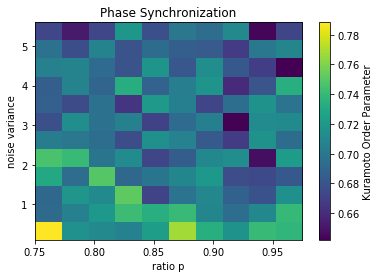

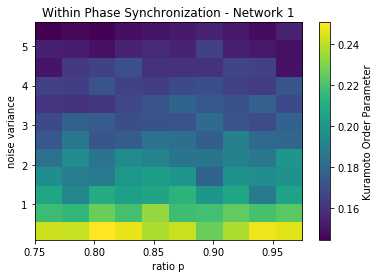

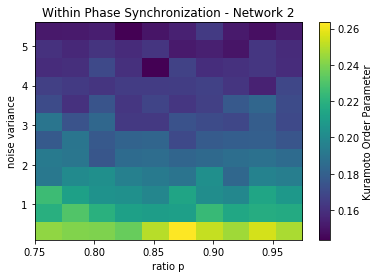

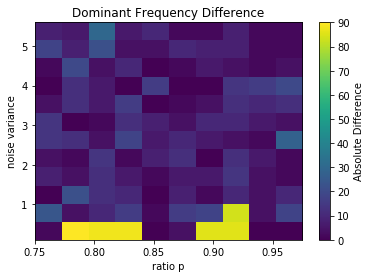

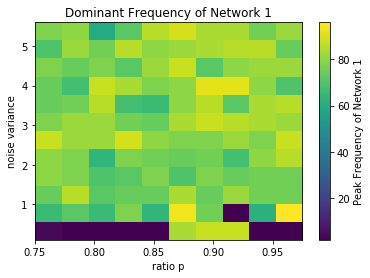

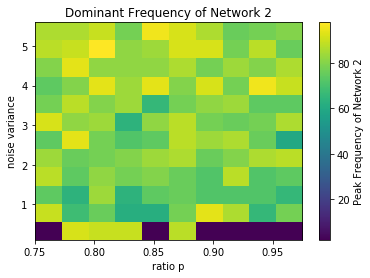

In [13]:
# phase synchronization
pivoted_synch = ex.df.pivot_table(values='phase_synchronization', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Phase Synchronization",
    colorbar="Kuramoto Order Parameter"
)

# within phase synchronization of net 1
pivoted_synch = ex.df.pivot_table(values='plv_net_1', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Within Phase Synchronization - Network 1",
    colorbar="Kuramoto Order Parameter"
)

# within phase synchronization of net 2
pivoted_synch = ex.df.pivot_table(values='plv_net_2', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_synch,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Within Phase Synchronization - Network 2",
    colorbar="Kuramoto Order Parameter"
)

# freq diff
plots.heat_map_pivoted(
    pivot_table=ex.df.pivot_table(values='freq_diff', index='poisson_variance', columns='poisson_p', aggfunc='first'),
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency Difference",
    colorbar='Absolute Difference'
)

# dom freq of network 1
pivoted_A = ex.df.pivot_table(values='peak_freq', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_A,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency of Network 1",
    colorbar='Peak Frequency of Network 1'
)

# dom freq of network 2
pivoted_B = ex.df.pivot_table(values='peak_freq_2', index='poisson_variance', columns='poisson_p', aggfunc='first')
plots.heat_map_pivoted(
    pivot_table=pivoted_B,
    extent=[min(ex.df.poisson_p), max(ex.df.poisson_p), min(ex.df.poisson_variance), max(ex.df.poisson_variance)],
    title="Dominant Frequency of Network 2",
    colorbar='Peak Frequency of Network 2'
)

In [14]:
for key, model in ex.results.items():
    row = ex.df.iloc[key]

    title = ""
    for param in varying_params:
        title += f" {param}: {row[param]}"

#     plots.psd(model, title=f"PSD of 1st network - {title}", population=1, duration=1000)
    # plots.psd(model, title=f"PSD of 2nd network - {title}", population=2, duration=1000)

    # TODO: raster plots take too much memory and crash vs code currently ...
    # plots.raster(title="Raster of 1st network", model=model)
    # plots.raster(title="Raster of 2nd network", model=model, population=2)

In [15]:
data = list([(ex.df.iloc[key][param], item) for key, item in ex.results.items()])
titles, models = zip(*data)

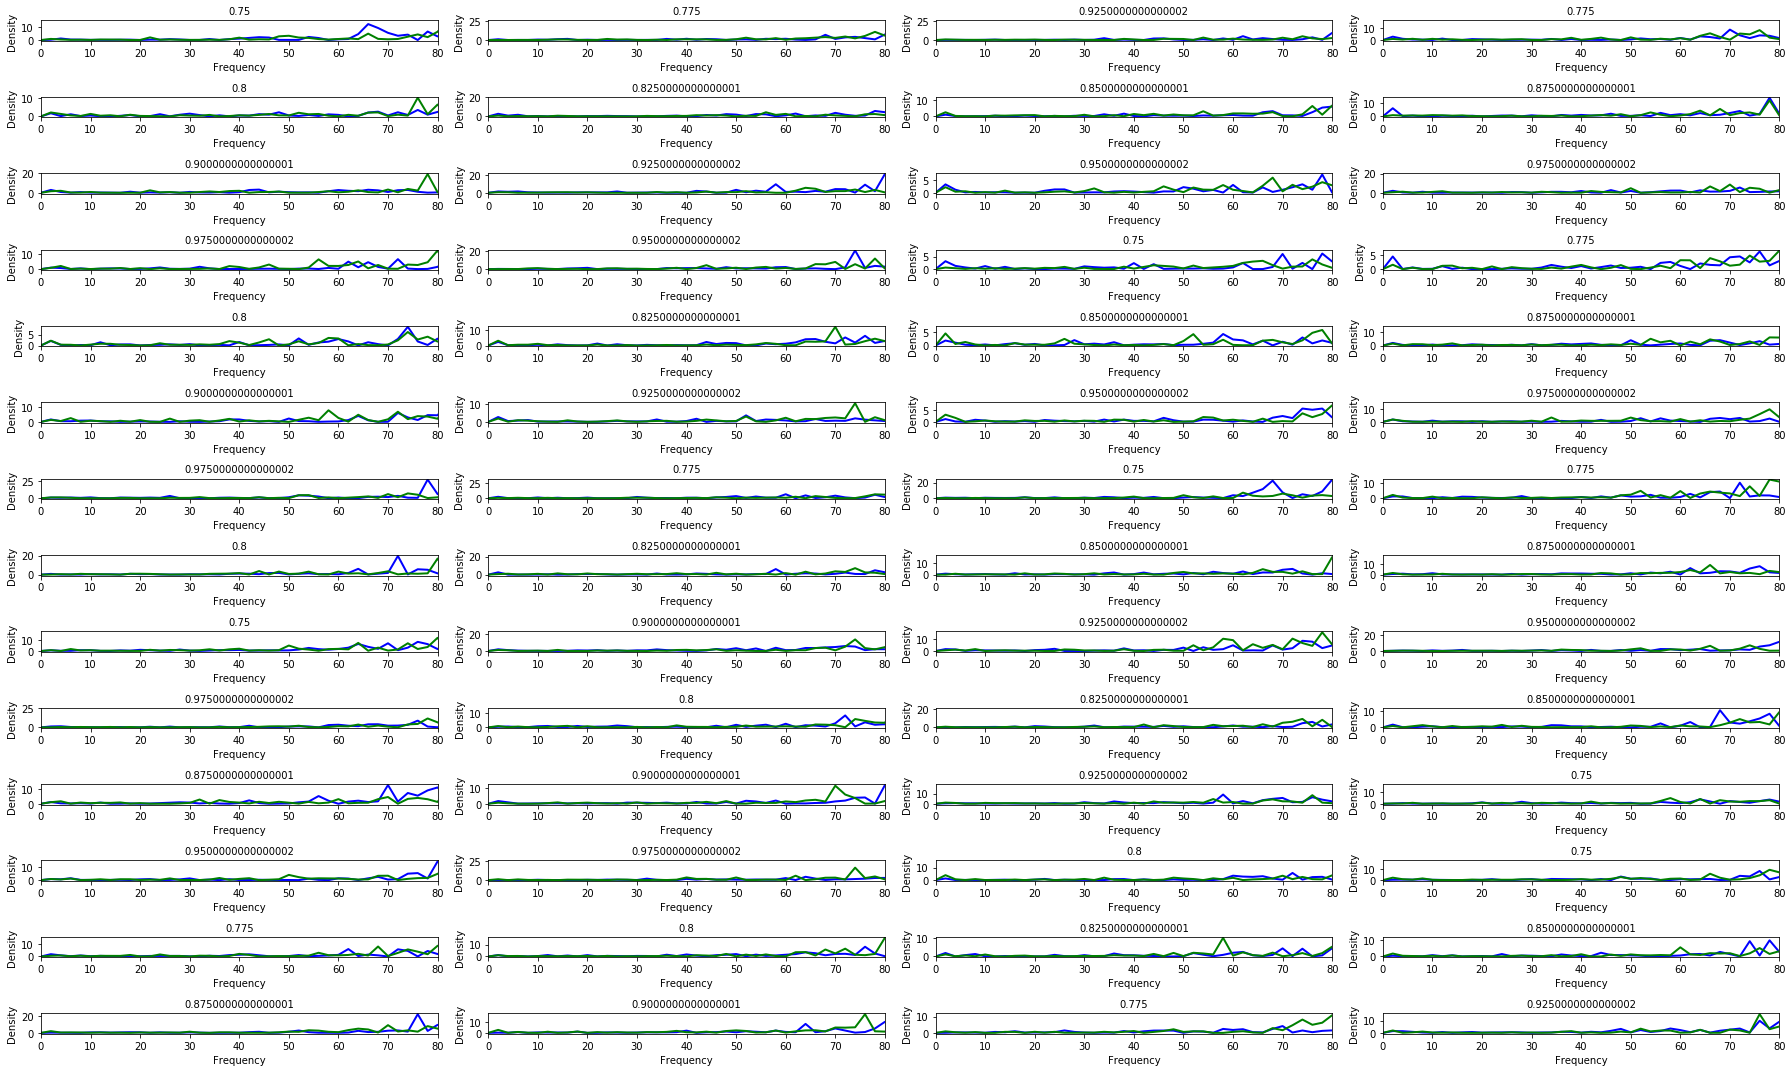

In [16]:
plots.all_psd(data, n_cols=14, n_rows=4, figsize=(25, 15))
plt.show()

(<Figure size 720x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13353afd0>)

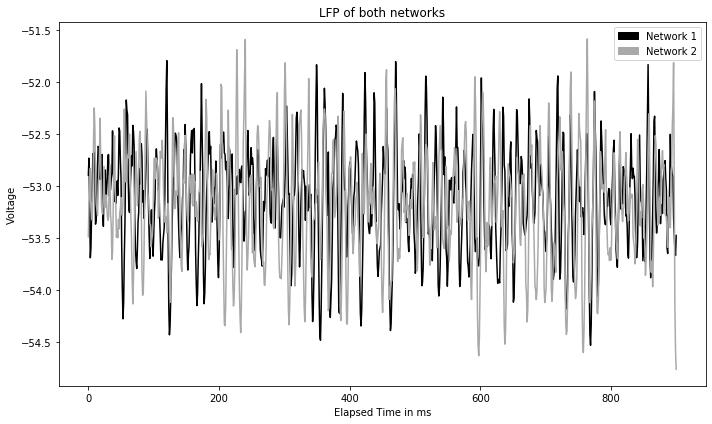

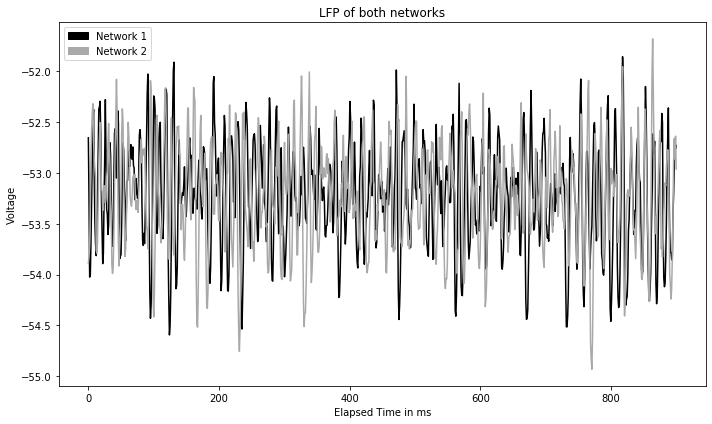

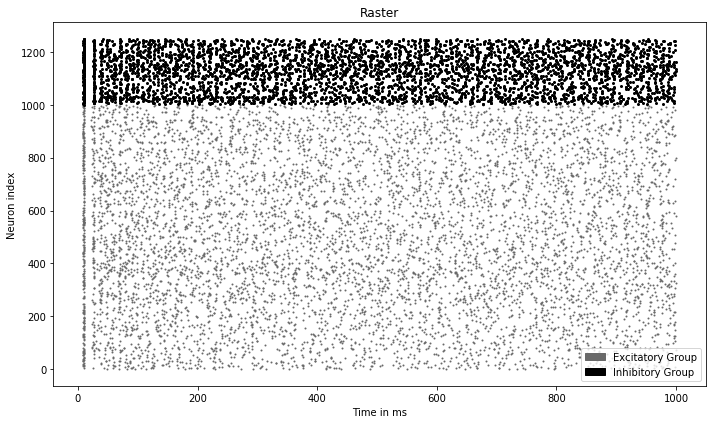

In [17]:
# no activity  -> subthreshold
plots.lfp_nets(models[0], skip = 100)

# high frequency oscillation
plots.lfp_nets(models[2], skip = 100)
plots.raster(models[2])

# high frequency oscillation
# plots.lfp_nets(models[6])
# plots.raster(models[6])

1. Next steps for parameter exploration:
    * run on server or on my second computer
 
2. Next steps to analyze and compare specific parameter sets
    * use different notebook to experiment and analyze specific sets
    * reduce complexity of model -> smaller number of neurons, only one network, etc.

Analyze spike time variability

* plot voltage trace of a single neuron to see when it spikes

Okay, what are the most important next steps?

1. Need to aggregate data to understand parameter exploration results
2. Look at increasing noise and analyze in detail -> Sunday

3. Run parameter exploration and see if network 1 and network 2 synchronize at some point!